# PCA
Christiaan van Roon - 11122854
Sander Hansen - 10995080

Because this code was first in native Python, it is best to run everything at once. The images will appear on the bottom.

*Because an 256 × 256 image contains 232 × 232 = 53824 details of 25 × 25 pixels the matrix X
would be a 625 × 53824 matrix. Therefore in calculating S we will use the incremental calculations
as outlined in a previous exercise (each example vector $x_i$
is added to the running sum vector—to
calculate the mean afterwards—and the $x_ix_i^T$
is added to the 625 × 625 matrix. Then after all samples
are processed we can calculate the mean vector m and the sample covariance matrix S.*

As you can see m and S are calculated with the following formulas;

$$m = 1/n \sum\limits_{i=1}^n x_i$$
$$S = ((\sum_{i=1}^n x_ix_i^t))-n mm^t)/(n-1)$$

In [4]:
from pylab import *

a = imread('data/trui.png')
d = a[100:126,100:126]


vector = np.zeros((625, 1))
matrix = np.zeros((625, 625))

# Vector sum and matrix
for i in range(232):
    for j in range(232):
        xi = a[i:i+25, j:j+25].reshape((625, 1))
        vector += xi
        matrix += xi * np.transpose(xi)

# Calculate mean and covariance matrix
m = vector / (232.0 * 232.0)
S =  ((matrix - ((232.0 * 232.0) * m * np.transpose(m))) /
     (232.0 * 232.0 - 1))

*PCA analysis then reveals the EigenStructure of this image. Plot the ’scree diagram’ showing the
eigenvalues from high to low. Plot the first 6 eigenvectors as images!*


Populating the interactive namespace from numpy and matplotlib


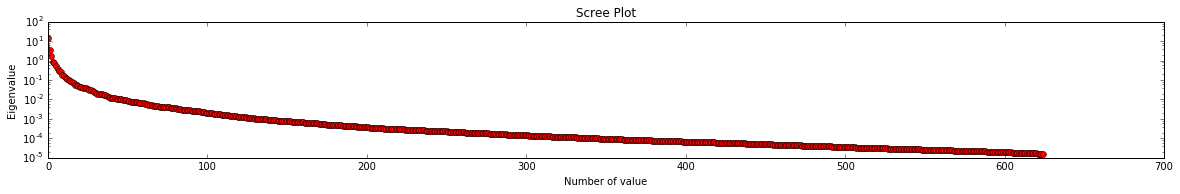

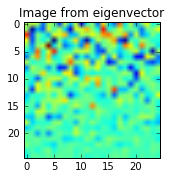

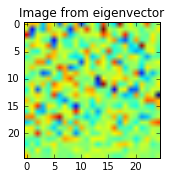

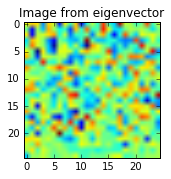

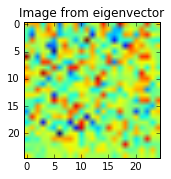

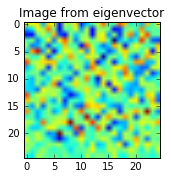

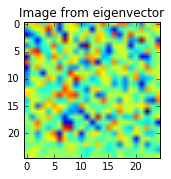

In [21]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20,20)
# Calculate eigen values
eigenvalues, eigenvectors = np.linalg.eig(S)
index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[index]
sorted_eigenvectors = eigenvectors[:, index]

plt.subplot(7,1,1)
xvals = np.arange(sorted_eigenvalues.shape[0])
plt.plot(xvals, sorted_eigenvalues, "ro-", linewidth=1)
plt.title("Scree Plot")
plt.ylabel("Eigenvalue")
plt.yscale("log")
plt.xlabel("Number of value")
plt.show()

# Plot eigen vectors (6 biggest ones)
for i in range(6):
    plt.subplot(7,1,i+2)
    plt.title("Image from eigenvector")
    image = sorted_eigenvectors[i].reshape((25,25))
    imshow(image)
    plt.show()



*Then write a function that displays a detail from the image (at a position that are parameters to the
function) and the same detail but then reconstructed from only k eigenvectors (make k a parameter of
your function).*

In [7]:
def get_detail(a, x, y, k, e_vector, mean):
    detail = a[x:x + 25,y:y + 25]

    # Calc coordinates
    detail_1D = (a[x:x + 25, y: y + 25].reshape((625, 1)) - mean)

    coord_1D = np.dot(np.transpose(e_vector), detail_1D)

    # Make picture
    eigen_detail = (np.dot(e_vector[:, :k], coord_1D[:k]) +
                    mean).reshape((25, 25))

    return detail, eigen_detail

*What would you think is a good choice for k to reconstruct image details with ’enough’
accuracy?*

Populating the interactive namespace from numpy and matplotlib


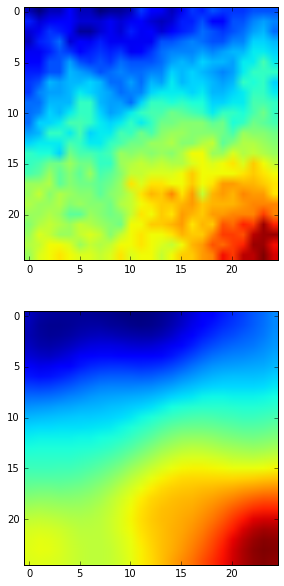

In [26]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10,10)

detail, eigen_detail = get_detail(a, 0, 0, 20, sorted_eigenvectors, m)

plt.subplot(2,1,1)
imshow(detail)
plt.subplot(2,1,2)
imshow(eigen_detail)

plt.show()

A k of 20 would be big enough.